In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [15]:
heart_data = pd.read_csv("HeartDiseaseTrain-Test.csv")
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [16]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [17]:
heart_data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [18]:
heart_data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [19]:
heart_data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

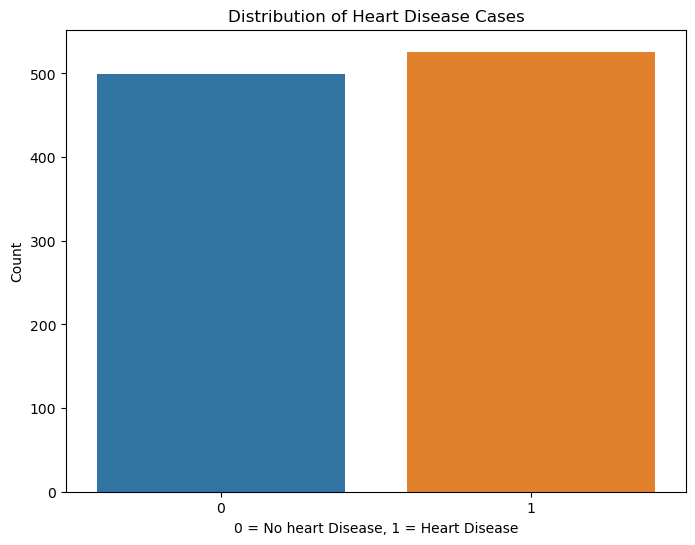

In [21]:
# checking distribution of
plt.figure(figsize=(8,6))
sns.countplot(x = "target", data=heart_data)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('0 = No heart Disease, 1 = Heart Disease')
plt.ylabel('Count')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


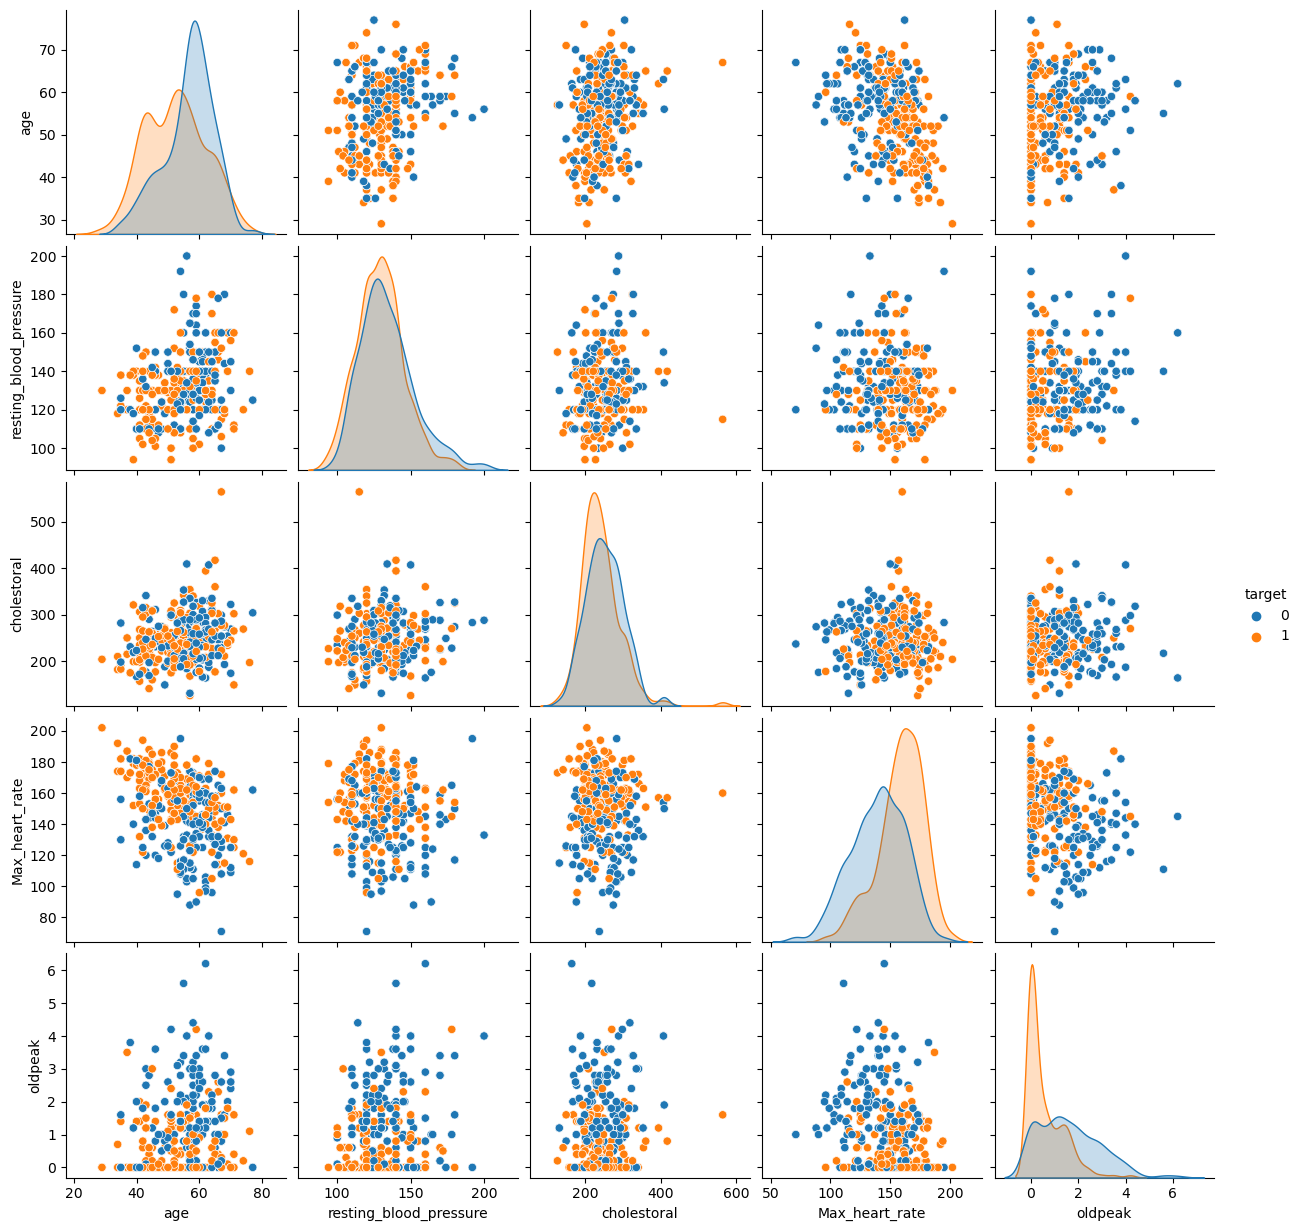

In [24]:
# pairplot diagram
plot_features = heart_data[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate','oldpeak', 'target']]
sns.pairplot(plot_features, hue='target', diag_kind='kde')
plt.show()

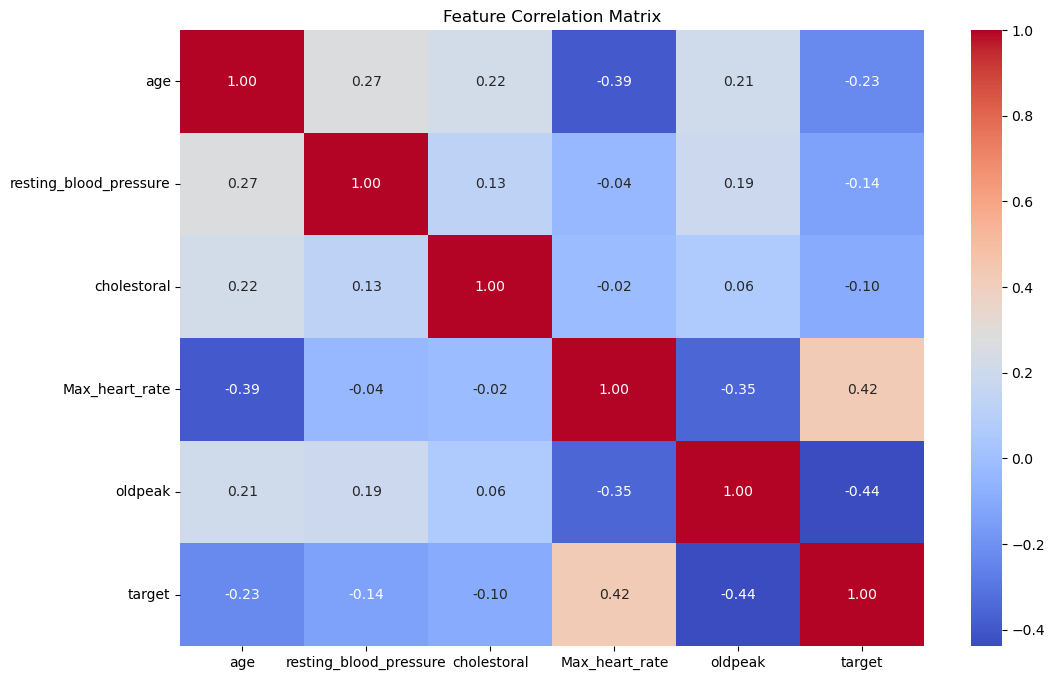

In [26]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = plot_features.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
#define the labels
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# split the variables for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [34]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate','oldpeak']
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [37]:
#train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, random_state=42)
lr.fit(X_train[num_columns], y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [48]:
#predict
y_lr_predict = lr.predict(X_test[num_columns])
y_lr_probability = lr.predict_proba(X_test[num_columns])

In [54]:
# model evaluation
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           roc_auc_score, roc_curve, classification_report)
evaluation = accuracy_score(y_test, y_lr_predict)
print(f"Accuracy score is: {evaluation:.4f}")

Accuracy score is: 0.7370


In [55]:
evaluation_roc = roc_auc_score(y_test, y_lr_predict)
print(f"Receiver Operating Characteristic roc: {evaluation_roc:.4f}")

Receiver Operating Characteristic roc: 0.7359


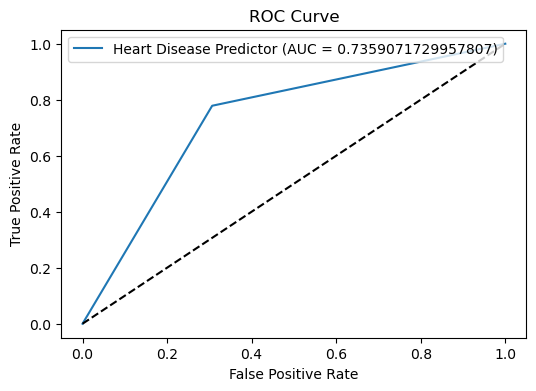

In [56]:
model_name = "Heart Disease Predictor"
fpr, tpr, _ = roc_curve(y_test, y_lr_predict)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {evaluation_roc})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

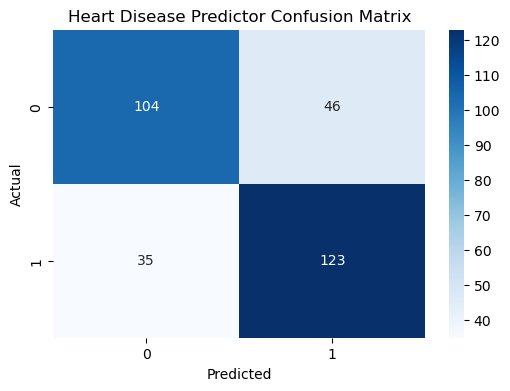

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_lr_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'{model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

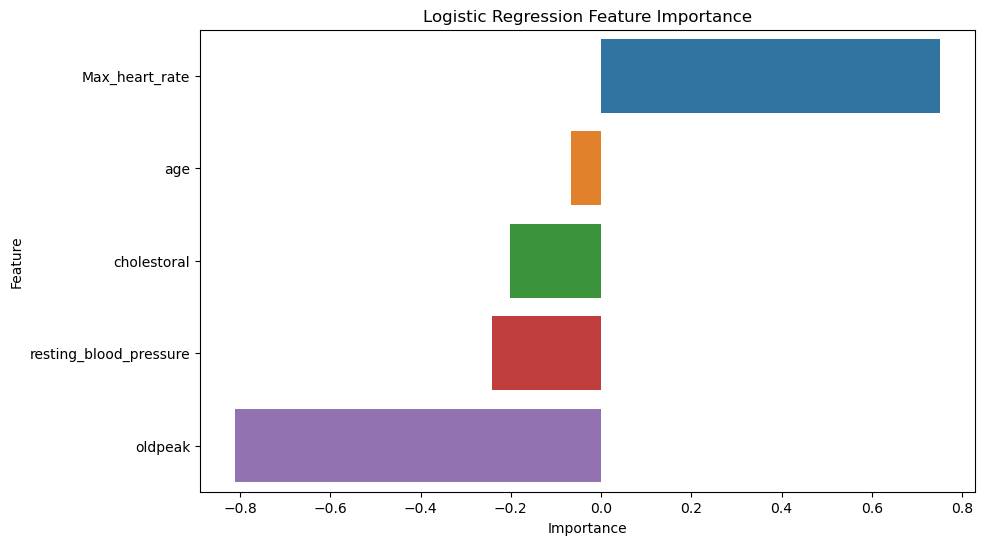

In [59]:
# Logistic Regression Coefficients
lr_coef = pd.DataFrame({'Feature': X_train[num_columns].columns, 
                       'Importance': lr.coef_[0]})
lr_coef = lr_coef.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=lr_coef)
plt.title('Logistic Regression Feature Importance')
plt.show()